# Projet Big Data - Bloch Soline

But du projet: Identification de phénomène d’antisélection en assurance automobile, par l’utilisation de modèles de Machine Learning sur deux bases de données normalisées. L’une venant d’un portefeuille d’assurance et l’autre venant du gouvernement.

Importation des bibliothèques

In [1]:
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_text
#from sklearn.tree import export_text
#from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import seaborn as sns
import numpy as np
import graphviz 
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [22]:
import warnings
warnings.filterwarnings('ignore')

Importation des données

In [3]:
raw_data = pd.read_csv("BDD.csv")

## Exploration des données 


Nous allons exploré les données de notre portefeuille

In [4]:
corr = raw_data.corr()

<AxesSubplot:>

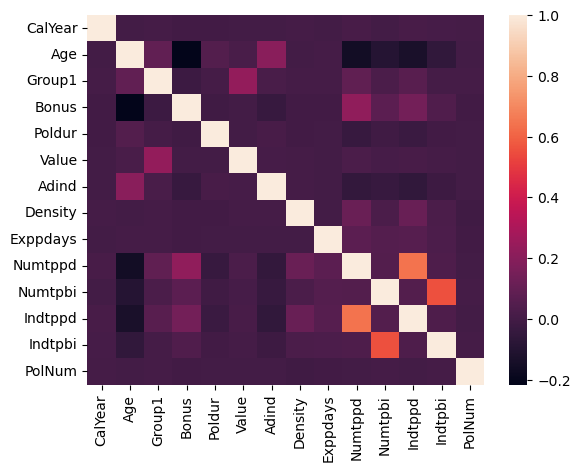

In [5]:
# plot the heatmap
sns.heatmap(corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns)

Nous sélectionnons les varibales qui nous intéressent pour faire un subset et on crée une nouvelle variable accident qui nous indique si l'assuré a eu un accident ou non.

<AxesSubplot:>

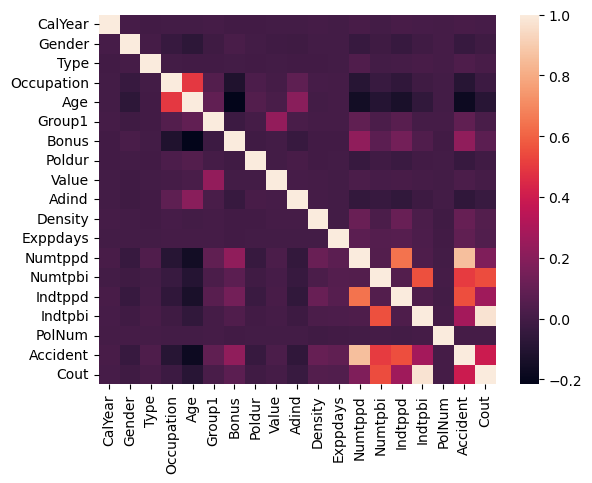

In [6]:
data_cook = raw_data 
data_cook['Gender'].replace(['Male', 'Female'],
                        [0, 1,], inplace=True) # Si c'est une femme on met un 1 

data_cook['Type'].replace(['A', 'B','C','D','E','F'],
                        [0,1,2,3,4,5], inplace=True)

data_cook['Occupation'].replace(['Employed', 'Unemployed','Housewife','Self-employed','Retired'],
                        [0,1,2,3,4,], inplace=True)
data_cook['Accident'] = np.where((data_cook['Numtppd']!= 0)| (data_cook['Numtpbi']!= 0), 1, 0)
#data_cook.drop('Numtppd', inplace=True, axis=1)
#data_cook.drop('Numtpbi', inplace=True, axis=1)
data_cook['Cout']= data_cook['Indtppd'] +data_cook['Indtpbi']

corr2 = data_cook.corr()
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns)

In [7]:
data = data_cook[["Gender", "Age", "Type", "Occupation","Accident"]]

Ici, on ne s'interessera pas à la distinction entre les accidents corporels ou matériels on ne s'interesse qu'à l'occurence d'un accident. Bien entendu les variables Coût et Accident sont corrélés avec les variables décrivant le nombre de sinistres corporels et le nombres de sinistres matériels et leur coûts.
Nous avons crée un dataframe avec les informations que l'on pourrait demander pour une souscription express et la variable nous indiquant si l'assuré a eu un accient où non.

Parmi nos assurés nous avons eu 15,79% d'entre eux qui ont eu un accident.

In [8]:
tab_nbr_Accident = data["Accident"].value_counts()
prc_Accident = (tab_nbr_Accident[1]/(tab_nbr_Accident[1]+tab_nbr_Accident[0]))*100
print(prc_Accident,'%')

15.790000000000001 %


On transforme la sorties de nos variables qualitatives par des nombres afin que cela puisse être lu  et iimplémenter dans les modèles

On refait une matrice de corrélation

<AxesSubplot:>

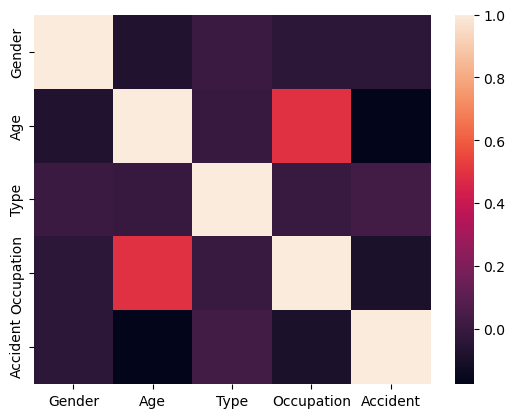

In [9]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Ici on remarque une corrélation entre les variable Age et Occupation qui est logique, des personnes jeunes sont plus souvent étudiantes et des personnes âgées sont plus souvent retraités.

In [29]:
data_agg= data_cook.groupby('Age', as_index=False).agg('sum')
data_agg.shape

(58, 19)

Text(0, 0.5, "Nombre d'accident")

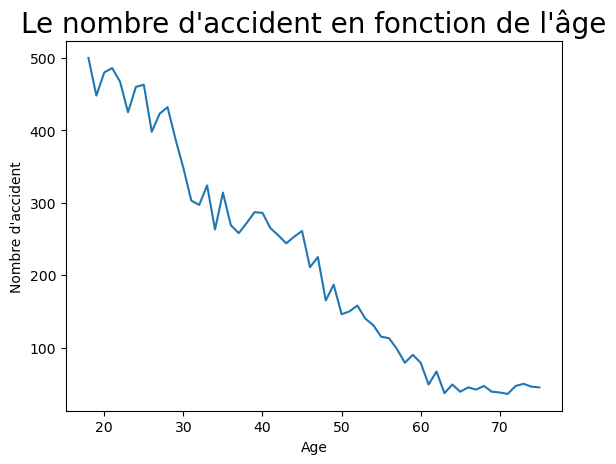

In [30]:
plt.plot(data_agg["Age"], data_agg["Accident"])
plt.title("Le nombre d'accident en fonction de l'âge", fontsize=20)
plt.xlabel('Age')
plt.ylabel("Nombre d'accident")

Une relation entre l'âge et le nombre d'accident semble évident. Plus les conducteurs sont jeunes plus ils auraient d'accident Pour confirmer qu'il semble que les jeunes ont plus d'accident que les personnes âgées nous allons regarder la composition du portefeuille au niveau des âges

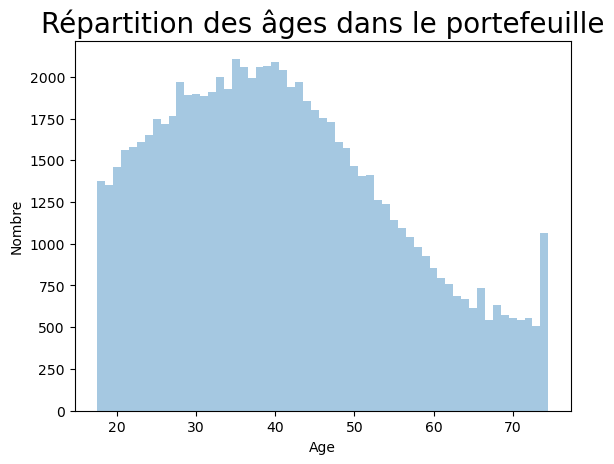

In [31]:
sns.distplot(data_cook["Age"],bins=np.arange(data_cook["Age"].min(), data_cook["Age"].max()+1),kde=False,hist_kws={"align" : "left"})
plt.title("Répartition des âges dans le portefeuille", fontsize=20)
plt.xlabel('Age')
plt.ylabel("Nombre")
plt.show()

Le pic des âges est vers 40 ans et la distribution nous montre qu'il y a bien une relation entre l'âge et le fait d'avoir un accident

In [32]:
moy_age = data_cook["Age"].mean()
moy_age
moy_age_acc = data_cook[data_cook["Accident"]==1]["Age"].mean()
print(moy_age,moy_age_acc)

41.14915 35.30264407853072


In [33]:
med_age = data_cook["Age"].median()
med_age
med_age_cc = data_cook[data_cook["Accident"]==1]["Age"].median()
print(med_age,med_age_cc)

40.0 32.0


# Partie prédiction accident ou non 

Nous séparons nos données en 2 subsets pour pouvoir entrainer puis tester

In [10]:
X=data[["Gender","Age","Type","Occupation"]]
y=data[["Accident"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# SVM 

In [ ]:
#clf = svm.SVC()
#clf.fit(X_train, y_train)

In [ ]:
#clf.score(X_test, y_test, sample_weight=None)

# KNN

Le KNN ou K Nearest Neighbors est une technique de Machine Learning supervisé où l’algorithme va assigner une classe à chaque individu du test en regardant la classe de ces k voisins les plus proches et en assignant la classe majoritaire de ces voisins.

In [11]:
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [17]:
neigh.score(X_test, y_test, sample_weight=None)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.835625

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)

X_scaler_train = scaler.transform(X_train)
X_scaler_test = scaler.transform(X_test)

The optimal number of neighbors is 8


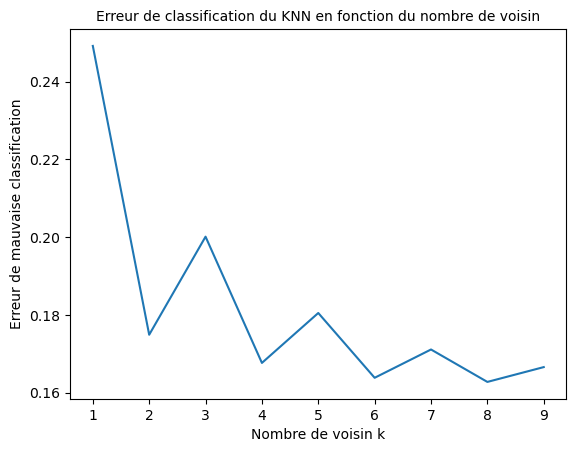

In [21]:
neighbors = list(range(1, 10, 1))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaler_train, y_train.values.ravel(), cv=5, scoring='accuracy')
    cv_scores.append(scores.mean(keepdims=True))
mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))
plt.plot(neighbors, mse)
plt.title("Erreur de classification du KNN en fonction du nombre de voisin", fontsize=10)
plt.xlabel("Nombre de voisin k")
plt.ylabel("Erreur de mauvaise classification")
plt.show()

Le nombre de voisin optimal pour le Knn est ici de 8 voisin on observe tout de même une certaine volatilité dans ce modèle

# Decision Tree

L’arbre de décision est une technique de machine Learning qui permet de classifier en plusieurs catégories des données. L’arbre de décision choisit à chaque fois un critère le plus discriminant pour séparer les données et hiérarchise ces critères

In [23]:
list(X_train.columns)

['Gender', 'Age', 'Type', 'Occupation']

[Text(0.5, 0.8333333333333334, 'Age <= 29.5\ngini = 0.266\nsamples = 64000\nvalue = [53910, 10090]'),
 Text(0.25, 0.5, 'Gender <= 0.5\ngini = 0.395\nsamples = 15741\nvalue = [11474, 4267]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.431\nsamples = 9331\nvalue = [6403, 2928]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.331\nsamples = 6410\nvalue = [5071, 1339]'),
 Text(0.75, 0.5, 'Occupation <= 3.5\ngini = 0.212\nsamples = 48259\nvalue = [42436, 5823]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.235\nsamples = 39846\nvalue = [34431, 5415]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.092\nsamples = 8413\nvalue = [8005, 408]')]

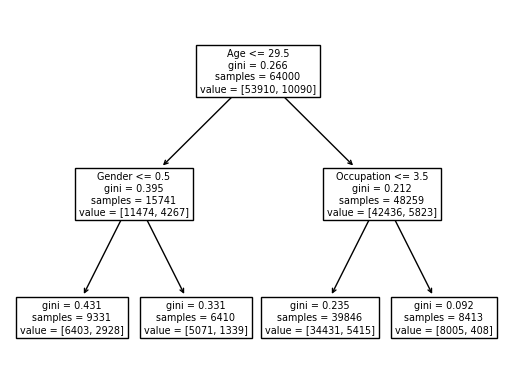

In [24]:
decision_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)
tree.plot_tree(decision_tree, feature_names=list(X_train.columns))
#L'indice de diversité de Gini peut être calculé en sommant la probabilité pour 
#chaque élément d'être choisi, multipliée par la probabilité qu'il soit mal classé.
#Value c'est le nombre d'individus dans chaqe classe

In [25]:
decision_tree.score(X_test, y_test, sample_weight=None)

0.841125

Nous allons tenter de faire un arbre de décision et une regression avec seulement les variables Age et Genre

In [26]:
X_agegender=data[["Gender","Age"]]
y_agegender=data[["Accident"]]

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_agegender, y_agegender, test_size=0.20, shuffle=True)

[Text(0.5, 0.8333333333333334, 'Age <= 29.5\ngini = 0.266\nsamples = 64000\nvalue = [53911, 10089]'),
 Text(0.25, 0.5, 'Gender <= 0.5\ngini = 0.396\nsamples = 15771\nvalue = [11475, 4296]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.431\nsamples = 9462\nvalue = [6490, 2972]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.332\nsamples = 6309\nvalue = [4985, 1324]'),
 Text(0.75, 0.5, 'Age <= 47.5\ngini = 0.211\nsamples = 48229\nvalue = [42436, 5793]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.241\nsamples = 28025\nvalue = [24095, 3930]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.167\nsamples = 20204\nvalue = [18341, 1863]')]

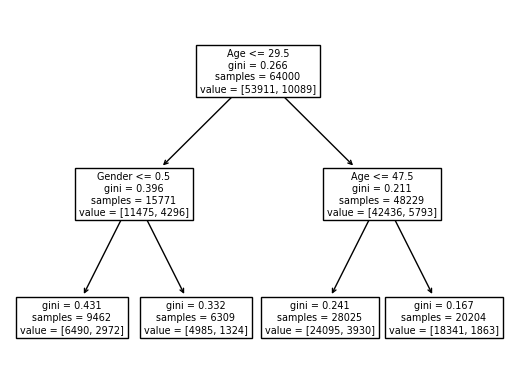

In [27]:
decision_tree_AgeGender = tree.DecisionTreeClassifier(max_depth=2)
decision_tree_AgeGender = decision_tree_AgeGender.fit(X_train_age, y_train_age)
tree.plot_tree(decision_tree_AgeGender, feature_names=list(X_train_age.columns))

In [28]:
decision_tree_AgeGender.score(X_test_age,y_test_age)

0.8410625

Nous remarquons que les scores entre le modèle avec les variables explicatives Age, Occupation Type et Genre et le modèle avec seulement les variables Genre et Age donnent des résultats très similaires et ceux que importent la profondeur indiquée. 

# Regression

Pour les data agrégée il est logique que la regression linéaire marche, cependant elle ne va pas fonctionner sur les individus car les valeurs en outpout prise sont de 1 ou 0. Nous allons donc faire une regression logistique sur ces données

In [34]:
reg_log = LogisticRegression().fit(X_train, y_train)
reg_log.score(X_test, y_test)
#reg_log.get_params(deep=True)

0.841125

In [36]:
reg_score=cross_val_score(LogisticRegression(), X, y.values.ravel(), cv=5, n_jobs=4)
reg_score.mean()

0.8421000000000001

In [38]:
reg_age_score = cross_val_score(LogisticRegression(), X_agegender, y_agegender.values.ravel(), cv=5, n_jobs=4)

In [39]:
reg_age_score.mean()

0.8421000000000001

In [40]:
reg = LinearRegression().fit(data_agg[["Age","Type","Occupation","Gender"]], data_agg["Accident"])
reg.score(data_agg[["Age","Type","Occupation","Gender"]],  data_agg["Accident"]) 
# La regression linéaire nous donne de très bon résultat sur la somme
#

0.9679350577255497

On remarque un drôle de phénomène sur les données aggrégés, c'est-à-dire où on a regroupé le nombre d'accident par âge la regression linéaire fonctionne très bien. Cela rejoint le premier noeud de notre decision tree où le citère de décision est l'âge. Aussi nous remarquons que la regression linéaire sur les données agrégées par âge donne un meilleur score que la regression logistique, nous allons essayer d'optimiser les paramètres de la regression logistique pour voir si d'autres paramètres nous donnerait un meilleur score. 

In [41]:
log_model = LogisticRegression()


In [42]:
param_grid =[ {
    "penalty" : ["l1", "l2", "elasticnet", "none"],
    "C": np.logspace(-4,4,20),
    "solver":["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
    "max_iter" : [100, 1000, 2500, 5000]
}]

In [43]:
log_param = GridSearchCV(log_model, param_grid=param_grid, cv=3, n_jobs=-1)

In [44]:
best_log = log_param.fit(X_train, y_train)

In [45]:
best_log.best_estimator_

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [46]:
best_log.score(X_train, y_train)

0.84234375

On remarquera que les résultats ne sont pas meilleurs même en optimisant les hyper paramètres

# Forest

Tentons un randm forest pour voir si les résultats sont meilleurs qu'aec un decision tree

In [48]:
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(X_train, y_train)

In [49]:
forest

RandomForestClassifier(n_estimators=10)

In [50]:
forest.score(X_test, y_test, sample_weight=None)

0.8368125

NOus voyons que les random forest ne donne pas de meilleurs résultats que l'arbre de décision. 

# Partie prédiction cout du sinistre

Le but de cette partie sera d'estimer le coût des sinistres sur différents critères. Commençons par représenté les sinistres et leur coût

Text(0.5, 1.0, 'Coût des accidents')

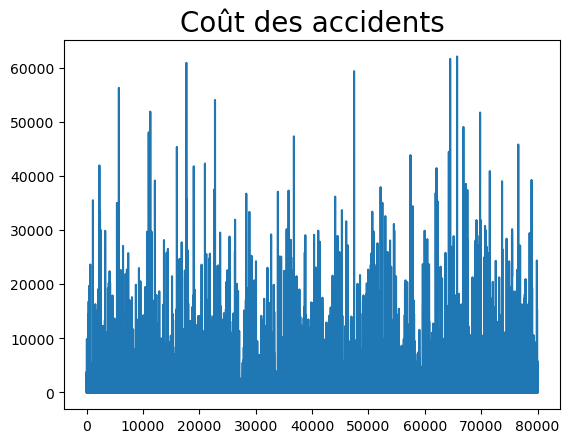

In [51]:
plt.plot(data_cook["Cout"])

plt.title("Coût des accidents", fontsize=20)

On se doute que ce sont les accident corporels qui sont le plus couteux que les accidents matériels Faison un graphiques distinguant les deux.

In [52]:
model = XGBRegressor()

In [53]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

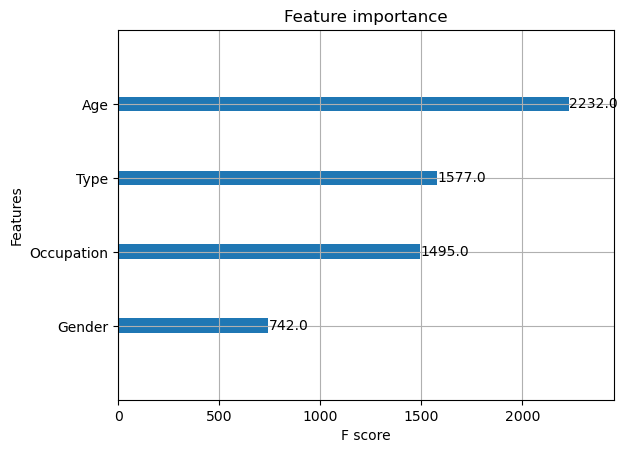

In [54]:
xgb.plot_importance(model, ax=plt.gca())

Nous voyons grâce aux modèle de la regrssion du XGBoost que la variable qui contribue le plus dans le coût d'un sinistre est l'âge

In [55]:
pred_train= model.predict(X_train)

In [56]:
print(r2_score(y_train, pred_train))

0.07763392902302457


In [57]:
print (mean_squared_error(y_train, pred_train))

0.12249091230553238


# Prediction accident grave de ce jeux de données 

Enfait, ici on observe que dans ce portefeuille d'assurance les jeunes semblent avoir beaucoup d'accident et des accidents coutueux. Cependant, il faut toujours se rappeler qu'un portefeuille d'assurance n'est pas représentatif de la réalité, en effet il peut y avoir un risque d'anti-selection. La tarification étant mauvaise les bons risques trouvent des contrats moins onéreux dans d'autres compagnies d'assurance et les mauvais risques trouvent que c'est le meilleur contrat.
Les bases de données publiques de l'open data sont des ressources que l'on peut utilisé si l'on veut une vision plus globale. On se servira de ces données dans la suite https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/ .

L'objectif est de tester nos modèle de machine learning sur ces données et cela nous permettra de confirmer ou non l'importance de la variable âge dans les accidents et ainsi de déterminer si on était pas dans le cas d'une mauvaise tarification. 

Il est à noter que nous ne sommes pas sûr de quel pays vient ce portefeuille d'assurance (parce que les variable Group2 et SubGroup2 feraient référence aux régionx cependant nous ne trouvons pas leur modalités sur internet ni plus d'explication dans la présentation de la base) mais il a été donnée par le professeur Arthur Charpentier et nous remarquons qu'il n'y a pas d'assurés de moins de 18 ans nous supposons que c'est un portefeuille d'assurés européen. Il est donc cohérent de se servir de la base des accidents en France


## Préparation des bases de l'open data

Nous nous servirons des bases caractéristiques et usagers sur le site de data.gouv. Nous allons légerement les modifier. Commençons par la base usager notre but est d'avoir 1 ligne avec ID du véhicule l'âge du conducteur, le sexe du conducteur, le nombre de passager la moyenne d'âge des passager et le nombre de piétons impliqué dans l'accident. (On ne prend pas en compte l'âge du piéton car les personne que l'on croise sont généralement aléatoires). Une fois cetet base crée on va l'enrichir des informations détenues dans la base caractéristiques en y rajoutant le jour, le mois et l'heure de l'accident.

## Préparation data gouverment

Import et modification des données du gouvernement

In [58]:
gouv_raw = pd.read_csv("usagers-2021.csv", sep=";")

In [59]:
#gouv_raw.head()

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
0,"2,021E+11",201 764,B01,1,1,3,1,2000.0,1,0,9,-1,0,0,-1
1,"2,021E+11",201 765,A01,1,1,1,1,1978.0,1,1,-1,-1,0,0,-1
2,"2,021E+11",201 762,A01,1,1,4,1,1983.0,0,1,-1,-1,0,0,-1
3,"2,021E+11",201 763,B01,1,1,3,1,1993.0,0,1,-1,-1,0,0,-1
4,"2,021E+11",201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1


In [60]:
#gouv_raw.shape

(129153, 15)

In [61]:
gouv_raw["nb_conducteur"] = np.where(gouv_raw["catu"]==1, 1, 0)
gouv_raw["Age_conducteur"] = np.where(gouv_raw["catu"]==1, (2021 - gouv_raw["an_nais"]), 0)
gouv_raw["Sexe_conducteur"] = np.where(gouv_raw["catu"]==1,gouv_raw["sexe"] , 0)
gouv_raw["nb_passager"] = np.where(gouv_raw["catu"]==2, 1, 0)
gouv_raw["Age_passager"] = np.where(gouv_raw["catu"]==2, (2021 - gouv_raw["an_nais"]), 0)
gouv_raw["nb_pieton"] = np.where(gouv_raw["catu"]==3, 1, 0)

#raw_usager.head(25)

In [62]:
gouv_raw.drop("trajet",inplace=True, axis=1)
gouv_raw.drop("secu1",inplace=True, axis=1)
gouv_raw.drop("secu2",inplace=True, axis=1)
gouv_raw.drop("secu3",inplace=True, axis=1)
gouv_raw.drop("locp",inplace=True, axis=1)
gouv_raw.drop("actp",inplace=True, axis=1)
gouv_raw.drop("etatp",inplace=True, axis=1)


In [63]:
gouv_raw["grav"].replace([4,2],
                        [2, 4,], inplace=True) # Echelle de gravité 
#Le but était d'échanger car l'échelle n'était pas logique maintenant l'ordre est logique

In [ ]:
#raw_usager.head()

Quand nous allons agregate les données ce qui nous intéresse c'est de savoir si y'a eu des bléssé grave donc on prend le max de la colonme gravite. Avant on modifie la colomne gravite pour avoir les modalités suivantes.
    1- Indemne
    2- Bléssé léger
    3- Bléssé hospitalisé
    4- Tué

In [64]:
gouv_agg= gouv_raw.groupby('id_vehicule', as_index=False).agg({"nb_conducteur":"sum","Age_conducteur":"sum" , "nb_passager": "sum", "nb_pieton" : "sum"
                                                                  ,"Age_passager":"mean", "grav":"max", "Sexe_conducteur":"sum"})
#usager_agg.head(25)

Notre première base de données de notre portefeuille d'assurance nous donnait les accidents corporels sur des tiers, donc nous allons enlever toutes les lignes où il n'y a que le conducteur de concerné. Pour être au plus proche

In [106]:
gouv_fil = gouv_agg[(gouv_agg["nb_passager"] + gouv_agg["nb_pieton"])>0]
gouv_fil.head(2)

,id_vehicule,nb_conducteur,Age_conducteur,nb_passager,nb_pieton,Age_passager,grav,Sexe_conducteur
14,100 896,1,38.0,2,0,18.333333,2,2
15,100 897,1,33.0,1,0,18.500000,2,1


Les accidents qui nous intéressent sont les accidents 3 et 4 se sont les plus grave ceux qui seront le plus couteux. Nous allons crée un modèle de machine learning sur les données de notre portefeuille

In [108]:
gouv_fil["Sexe_conducteur"].replace([1,2],
                        [0, 1,], inplace=True) # Si c'est une femme on met un 1 

On fait notre modèle en utilisant comme variable d'entrée que l'âge et le sexe sur les données de notre portefeuille. Comme dans la base de données que l'on vient de créer on aque les accidentés, on va ne s'intéressé qu'à la probabilité d'avoir un accident grave. On considerera de manière arbitaire qu'un accident corporel est grave à partir de 1000 euros de coût, parce que l'on considère qu'à partir de 1000 euros il y aurait eu des frais d'hospitalisation

In [109]:
gouv_fil["Acc_grave"] = np.where(gouv_fil["grav"]>2, 1, 0)

In [110]:
gouv_fil.shape

(23992, 9)

On flag aussi les accidents de gravité 3 et 4 dans la base de données des accidents du gouvernement

## Variable Acc_grave + test des modèles

Pour la base du gouvernement un sinistre est grave si au moins une des victimes a été blessé et hospitalisé (gravité niveau 3). Pour la base du portefeuille trouver cette limite est plus délicat, nous pourrons procéder des deux manières différentes :
-	Considérer qu’un sinistre est grave lorsque le coût associé dépasse le coût de 24h hospitalisation (le coût d’une nuit d’hospitalisation est d’environ 1300 euros en France, nous choisirons donc ce seuil)
-	Se référer au pourcentage d’accidents graves dans la base du gouvernement (ceux qui sont en gravité 3 ou 4) et prendre comme seuil sur la base du portefeuille le plus petit montant de ce pourcentage des accidents les plus onéreux.


In [100]:
data_etu = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]
data_etu["Acc_grave"] = np.where(data_etu["Indtpbi"]>3000, 1, 0) 

In [101]:
X_bis=data_etu[["Gender","Age"]]
y_bis=data_etu[["Acc_grave"]]
X_bis_train, X_bis_test, y_bis_train, y_bis_test = train_test_split(X_bis, y_bis, test_size=0.20, shuffle=True)

In [102]:
reg_bis_log = LogisticRegression().fit(X_bis_train, y_bis_train)
reg_bis_log.score(X_bis_test, y_bis_test)

0.8935496636327661

[Text(0.5, 0.8333333333333334, 'Age <= 20.5\ngini = 0.216\nsamples = 10105\nvalue = [8858, 1247]'),
 Text(0.25, 0.5, 'Age <= 18.5\ngini = 0.281\nsamples = 1159\nvalue = [963, 196]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 404\nvalue = [342, 62]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.292\nsamples = 755\nvalue = [621, 134]'),
 Text(0.75, 0.5, 'Age <= 56.5\ngini = 0.207\nsamples = 8946\nvalue = [7895, 1051]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.204\nsamples = 8121\nvalue = [7185, 936]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.24\nsamples = 825\nvalue = [710, 115]')]

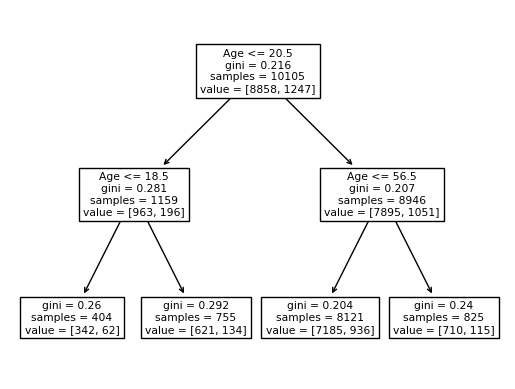

In [103]:
decision_bis_tree = tree.DecisionTreeClassifier(max_depth=2)
decision_bis_tree = decision_bis_tree.fit(X_bis_train, y_bis_train)
tree.plot_tree(decision_bis_tree, feature_names=list(X_bis_train.columns))

In [104]:
decision_bis_tree.score(X_bis_test, y_bis_test, sample_weight=None)

0.8935496636327661

In [111]:
gouv_fil=gouv_fil.rename(columns={"Sexe_conducteur": "Gender", "Age_conducteur": "Age"}, errors="raise")

In [112]:
gouv_fil.head()

,id_vehicule,nb_conducteur,Age,nb_passager,nb_pieton,Age_passager,grav,Gender,Acc_grave
14,100 896,1,38.0,2,0,18.333333,2,0,0
15,100 897,1,33.0,1,0,18.500000,2,0,0
24,100 906,1,27.0,1,0,13.000000,3,0,1
30,100 912,1,57.0,1,0,25.500000,2,0,0
32,100 914,1,27.0,3,0,9.500000,1,0,0


In [113]:
gouv_fil["Age"] = gouv_fil["Age"].astype(int)
gouv_fil.head()

,id_vehicule,nb_conducteur,Age,nb_passager,nb_pieton,Age_passager,grav,Gender,Acc_grave
14,100 896,1,38,2,0,18.333333,2,0,0
15,100 897,1,33,1,0,18.500000,2,0,0
24,100 906,1,27,1,0,13.000000,3,0,1
30,100 912,1,57,1,0,25.500000,2,0,0
32,100 914,1,27,3,0,9.500000,1,0,0


In [114]:
X_gouv = gouv_fil[["Gender","Age"]]
y_gouv = gouv_fil[["Acc_grave"]]

Text(0, 0.5, "Nombre d'accident")

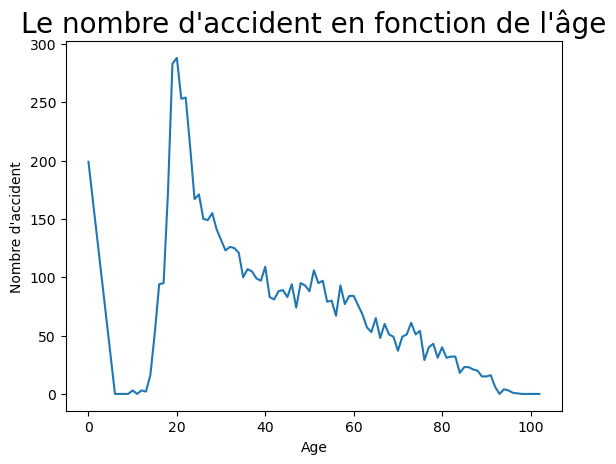

In [78]:
data_gouv_plot = gouv_fil.groupby("Age", as_index=False).agg({"Acc_grave":"sum"})

plt.plot(data_gouv_plot["Age"], data_gouv_plot["Acc_grave"])
plt.title("Le nombre d'accident en fonction de l'âge", fontsize=20)
plt.xlabel('Age')
plt.ylabel("Nombre d'accident")

In [79]:
decision_bis_tree.score(X_gouv, y_gouv , sample_weight=None)

0.7037345781927309

In [80]:
reg_bis_log.score(X_gouv, y_gouv)

0.7037345781927309

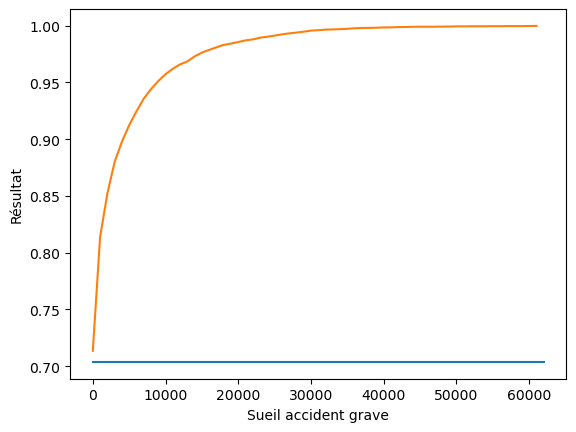

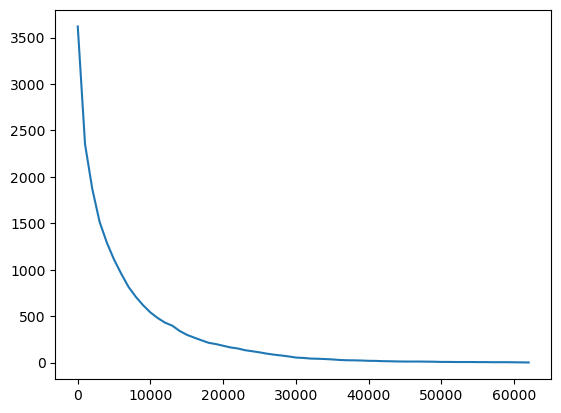

In [115]:
maxvariable = data_cook["Indtpbi"].max()
sueil_acc = list(range(0, int (maxvariable), 1000))
scores_sueil_gouv = []
scores_sueil_test=[]
nb_acc = []
#X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)

for i in sueil_acc:
    data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]
    data_sueil["Acc_grave"] = np.where(data_sueil["Indtpbi"]>i, 1, 0) # faire boucle pour monter les 1000
    
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    
    #print (data_sueil[data_sueil["Acc_grave"] == 1].shape[0])
    logisticRegr = LogisticRegression()

    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv, y_gouv, test_size=0.95,  shuffle=True)
    
    """"reg_sueil_log = reg_sueil_log.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg_gouv = reg_sueil_log.score(X_gouv_test, y_gouv_test)
    scores_sueil_gouv.append(scores_reg_gouv)"""
    
    scores_cros_reg_test = cross_val_score(logisticRegr, X_sueil, y_sueil.values.ravel(), cv=3, n_jobs=4)
    
    #scores_reg_sueil = reg_sueil_log.score(X_sueil_test, y_sueil_test) 
    scores_sueil_test.append(scores_cros_reg_test.mean())
    
    scores_cros_reg_gouv = cross_val_score(logisticRegr, X_gouv, y_gouv.values.ravel(), cv=3, n_jobs=4)
    scores_sueil_gouv.append(scores_cros_reg_gouv.mean())
    nb_acc.append(data_sueil[data_sueil["Acc_grave"] == 1].shape[0])

#print("The optimal number of threshold is {}".format(optimal_k))
plt.plot(sueil_acc, scores_sueil_gouv)
plt.plot(sueil_acc, scores_sueil_test)
plt.xlabel("Sueil accident grave")
plt.ylabel("Résultat")
plt.show()

plt.plot(sueil_acc,nb_acc)
plt.show()


In [ ]:
'''Xgouv2 = X_gouv
ygouv2 = y_gouv
X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(Xgouv2, ygouv2, test_size=0.95,  shuffle=False)
print (" type avant ", type(Xgouv2))
print ("\nType apres ", type (X_gouv_test))
print(Xgouv2.head(3))
print(X_gouv_test.head(3))
print (" type avant Y ", type(ygouv2))
print ("Type apres Y", type (y_gouv_test))
print(ygouv2.head(3))
print(y_gouv_test.head(3))'''

In [98]:
data_sueil = data_cook
data_sueil["Acc_grave"] = np.where(data_cook["Indtpbi"]>2000, 1, 0) 
X_sueil = data_sueil[["Gender","Age"]]
y_sueil = data_sueil[["Acc_grave"]] 

reg_sueil_log = LogisticRegression()

X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.20,  shuffle=True)
scores_cros_reg = cross_val_score(reg_sueil_log, X_sueil_test, y_sueil_test, cv=5)



In [96]:
scores_cros_reg.mean()

0.974375

### Test avec les sueil de supérieur à 1300 euros 

Text(0.5, 1.0, 'Score de la régression \n En orange: portefeuille \n En bleu: gouvernement')

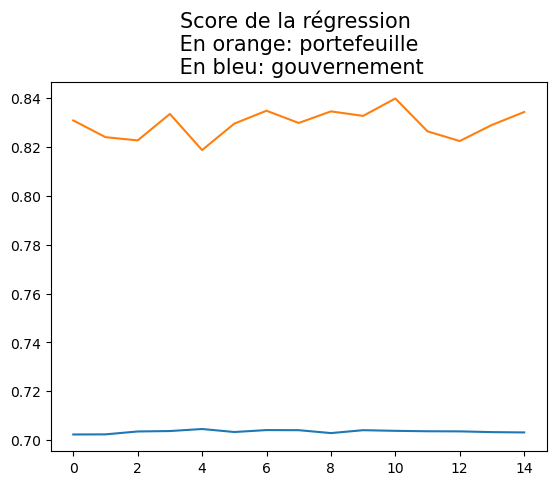

In [88]:
scores_gouv = []
scores_port=[]
inc = list(range(0, 15, 1))

for i in inc:
    data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]
    data_sueil["Acc_grave"] = np.where(data_sueil["Indtpbi"]>1300, 1, 0) 
    
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    
    logisticRegr = LogisticRegression()

    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.30,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv, y_gouv, test_size=0.95,  shuffle=True)
    
    reg_sueil_log = logisticRegr.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg_pt = reg_sueil_log.score(X_sueil_test, y_sueil_test)
    scores_reg_gouv = reg_sueil_log.score(X_gouv_test, y_gouv_test)
    scores_gouv.append(scores_reg_gouv)
    scores_port.append(scores_reg_pt)

plt.plot(list(range(0, 15, 1)),scores_gouv)
plt.plot(list(range(0, 15, 1)),scores_port )
plt.title("Score de la régression \n En orange: portefeuille \n En bleu: gouvernement", fontsize=15)


Sur les données du portefeuille, le score est aux alentours de 82% de précision, alors que pour le test sur les données du gouvernement, le score est aux alentours de 70% de précision. Cet écart de plus de 10% est significatif, cela pourrait être le signe d’anti sélection dans notre portefeuille

### Test avec les x% supérieur

On comptabilise le nombre d'accident de gravité 3 ou 4 et on divise par le nombre d'accident total

In [92]:
len(gouv_fil[(gouv_fil['grav']>2)])/len(gouv_fil[(gouv_fil['grav']>0)])

0.2962654218072691

In [93]:
data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]

data_sueil[["Indtpbi"]].describe()


,Indtpbi
count,12632.000000
mean,1417.783867
std,4479.111561
min,0.000000
25%,0.000000
50%,0.000000
75%,129.623037
max,62092.741637


On va donc sélectionner le 3ème quartile comme sueil et tester 

Text(0.5, 1.0, 'Score de la régression \n En orange: portefeuille \n En bleu: gouvernement')

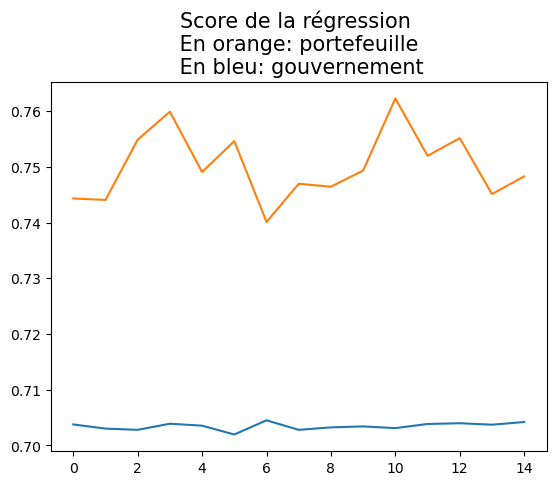

In [94]:
scores_gouv = []
scores_port=[]
inc = list(range(0, 15, 1))

for i in inc:
    data_sueil = data_cook[(data_cook["Numtppd"] + data_cook["Numtpbi"])>0]
    data_sueil["Acc_grave"] = np.where(data_sueil["Indtpbi"]>130, 1, 0) 
    
    X_gouv = gouv_fil[["Gender","Age"]]
    y_gouv = gouv_fil[["Acc_grave"]]
    
    X_sueil = data_sueil[["Gender","Age"]]
    y_sueil = data_sueil[["Acc_grave"]]  
    
    logisticRegr = LogisticRegression()

    X_sueil_train, X_sueil_test, y_sueil_train, y_sueil_test = train_test_split(X_sueil, y_sueil, test_size=0.30,  shuffle=True)
    X_gouv_train, X_gouv_test, y_gouv_train, y_gouv_test = train_test_split(X_gouv, y_gouv, test_size=0.95,  shuffle=True)
    
    reg_sueil_log = logisticRegr.fit(X_sueil_train, y_sueil_train.values.ravel())
    scores_reg_pt = reg_sueil_log.score(X_sueil_test, y_sueil_test)
    scores_reg_gouv = reg_sueil_log.score(X_gouv_test, y_gouv_test)
    scores_gouv.append(scores_reg_gouv)
    scores_port.append(scores_reg_pt)

plt.plot(list(range(0, 15, 1)),scores_gouv)
plt.plot(list(range(0, 15, 1)),scores_port )
plt.title("Score de la régression \n En orange: portefeuille \n En bleu: gouvernement", fontsize=15)


# Conclusion

Pour conclure, ce projet avait pour but d’utiliser le Machine Learning afin de détecter l’anti sélection dans des portefeuilles d’assurance automobile. Lors de l’étude de notre portefeuille, nous avions remarqué que l’âge jouait un rôle plus qu’essentiel dans la prédiction des accidents. Au point qu’en retirant les variables explicatives « Occupation » et « Type » de véhicule pour ne garder que les variable « Age » et « Genre » nous conservions le même niveau de précision du modèle. Nous avons donc décidé de croiser nos données avec celle du gouvernement en France trouvées sur data. Gouv. Nous nous intéressions plus au fait d’avoir un accident ou non mais au fait d’avoir un accident grave. 

La méthode où nous fixons un seuil à 1300 euros semble plus pertinente et réaliste que la seconde méthode. Nous trouvions un écart de plus de 10% ce qui serait le signe d’anti sélection. 

Cependant, cette étude comporte des limites et des axes d’amélioration. Au niveau de la base concernant le portefeuille d’assurance, nous n’avions pas de détail sur la provenance des données et leur pays d’origine. Au niveau des données du gouvernement, nous avions l’ensemble des accidents, mais nous ne savions si le conducteur était toujours responsable de l’accident nous avons donc supposer qu’il l’était. 

Une dernière approximation est le seuil à partir duquel on identifie un accident grave nous avons choisit 1300 euros qui est le coût d’une nuit d’hospitalisation cependant nous ne connaissons pas le coût des accidents en gravité 3 et 4 de la base gouvernementale et nous ne savons pas quel est le coût d’une nuit d’hospitalisation pour un assureur en moyenne sachant que la Sécurité Sociale prend en charge une partie. 
